In [26]:
from roms_tools import Grid

In [27]:
from roms_tools.setup.topography import _get_topography_data, _smooth_topography_globally

In [3]:
from roms_tools.setup.utils import get_target_coords

In [4]:
import xarray as xr

In [5]:
print(xr.__version__)

2024.10.0


In [6]:
import matplotlib.pyplot as plt

## Example cases

### Iceland

In [7]:
iceland_kwargs = {
    "size_x": 800,
    "size_y": 800,
    "center_lon": -19,
    "center_lat": 65,
    "rot": 20,
    "verbose": True,
}

In [8]:
%%time 

coarse_grid_iceland_ETOPO5 = Grid(
    nx=100, ny=100, **iceland_kwargs  # ROMS grid: 8km, ETOPO5: 4km              
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.015 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.351 seconds
INFO - Regridding the topography: 0.005 seconds
INFO - Preparing the masks: 0.003 seconds
INFO - Smoothing the topography globally: 0.007 seconds
INFO - Smoothing the topography locally: 1.459 seconds
INFO - Total time: 1.840 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 1.51 s, sys: 17.9 ms, total: 1.53 s
Wall time: 1.89 s


In [9]:
%%time 

coarse_grid_iceland_SRTM15 = Grid(
    nx=100, ny=100, **iceland_kwargs,  # ROMS grid: 8km, SRTM15: 200m
    topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }                           
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.015 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.013 seconds
INFO - Regridding the topography: 0.172 seconds
INFO - Preparing the masks: 0.003 seconds
INFO - Smoothing the topography globally: 0.007 seconds
INFO - Smoothing the topography locally: 1.699 seconds
INFO - Total time: 1.912 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 1.66 s, sys: 31.7 ms, total: 1.69 s
Wall time: 1.99 s


In [35]:
%%time 

medium_grid_iceland_ETOPO5 = Grid(
    nx=1000, ny=100, **iceland_kwargs  # ROMS grid: 800m, ETOPO5: 4km              
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.123 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.063 seconds
INFO - Regridding the topography: 0.009 seconds
INFO - Preparing the masks: 0.006 seconds
INFO - Smoothing the topography globally: 0.030 seconds
INFO - Smoothing the topography locally: 3.526 seconds
INFO - Total time: 3.648 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 3.55 s, sys: 23.8 ms, total: 3.57 s
Wall time: 3.81 s


In [36]:
%%time 

medium_grid_iceland_SRTM15 = Grid(
    nx=1000, ny=1000, **iceland_kwargs,  # ROMS grid: 800m, SRTM15: 200m
    topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }                           
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 1.496 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.227 seconds
INFO - Regridding the topography: 0.647 seconds
INFO - Preparing the masks: 0.138 seconds
INFO - Smoothing the topography globally: 0.429 seconds
INFO - Smoothing the topography locally: 8.637 seconds
INFO - Total time: 10.112 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 10.6 s, sys: 98.1 ms, total: 10.7 s
Wall time: 11.7 s


In [10]:
%%time 

fine_grid_iceland_ETOPO5 = Grid(
    nx=5000, ny=5000, **iceland_kwargs  # ROMS grid: 160m, ETOPO5: 4km          
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 51.255 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.074 seconds
INFO - Regridding the topography: 1.590 seconds
INFO - Preparing the masks: 3.103 seconds
INFO - Smoothing the topography globally: 16.933 seconds
INFO - Smoothing the topography locally: 189.484 seconds
INFO - Total time: 211.366 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.005 seconds
INFO - ========================================================================================================


CPU times: user 2min 30s, sys: 1min 47s, total: 4min 17s
Wall time: 4min 24s


In [11]:
%%time 

fine_grid_iceland_SRTM15 = Grid(
    nx=5000, ny=5000, **iceland_kwargs,  # ROMS grid: 160m, SRTM15: 200m
    topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }                           
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 50.689 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.014 seconds
INFO - Regridding the topography: 4.169 seconds
INFO - Preparing the masks: 13.267 seconds
INFO - Smoothing the topography globally: 16.865 seconds
INFO - Smoothing the topography locally: 357.013 seconds
INFO - Total time: 391.532 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 4min 25s, sys: 2min 46s, total: 7min 12s
Wall time: 7min 24s


In [12]:
#fine_grid_iceland.save("/glade/derecho/scratch/noraloose/grids/Iceland_5000.nc")

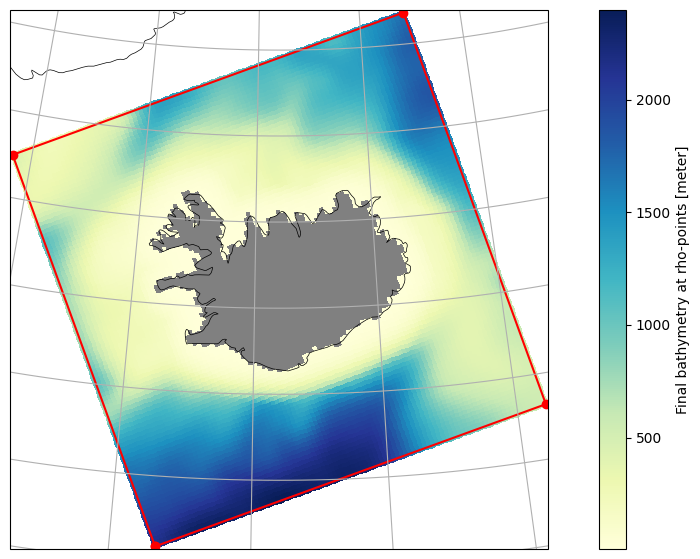

In [13]:
coarse_grid_iceland_ETOPO5.plot(bathymetry=True)

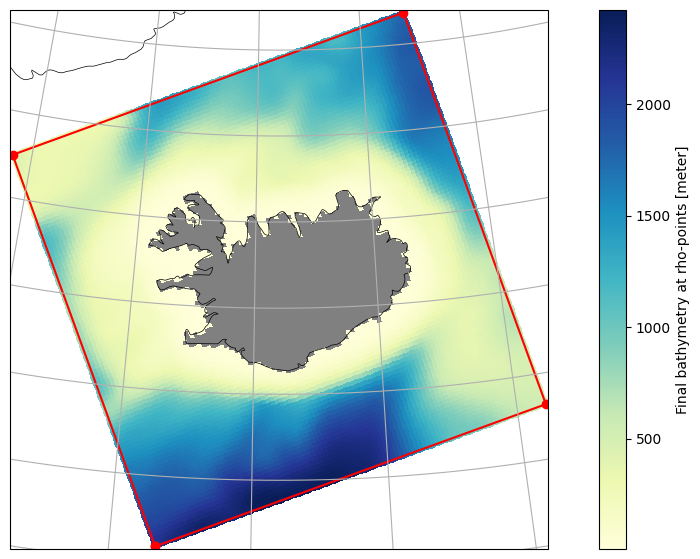

In [14]:
coarse_grid_iceland_SRTM15.plot(bathymetry=True)

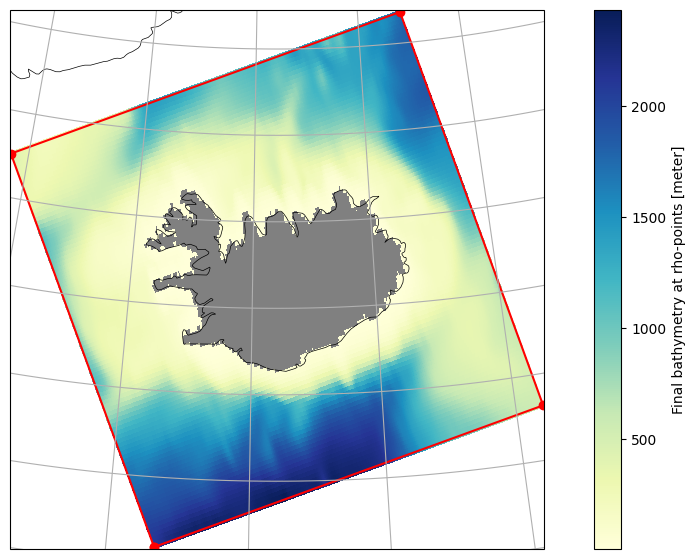

In [38]:
medium_grid_iceland_ETOPO5.plot(bathymetry=True)

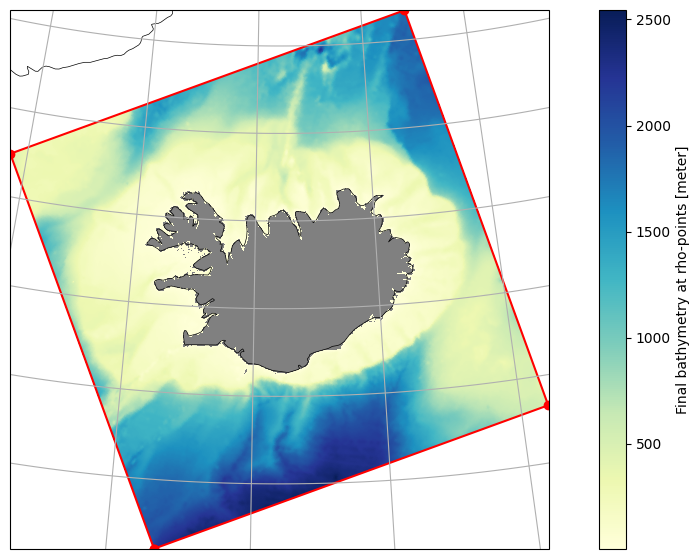

In [37]:
medium_grid_iceland_SRTM15.plot(bathymetry=True)

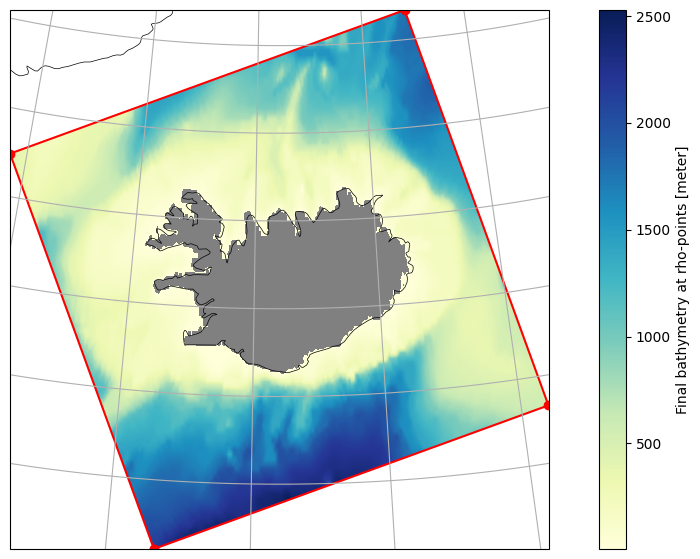

In [15]:
fine_grid_iceland_ETOPO5.plot(bathymetry=True)

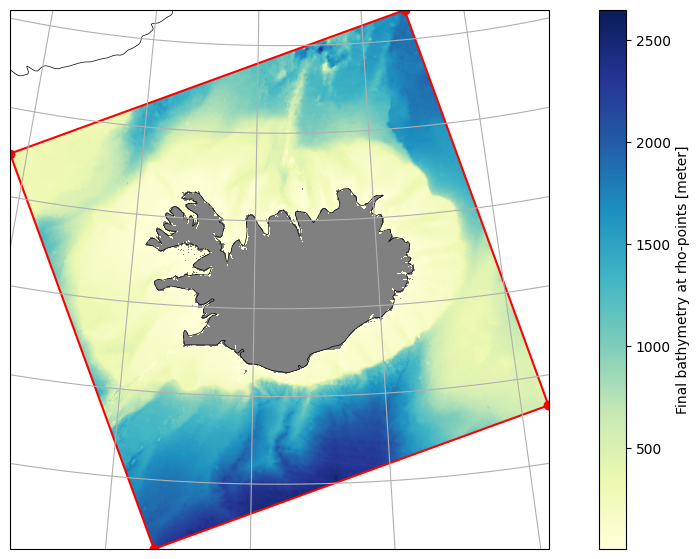

In [16]:
fine_grid_iceland_SRTM15.plot(bathymetry=True)

### Wales

In [17]:
wales_kwargs = {
    "size_x": 240,
    "size_y": 240,
    "center_lat": 52.36,
    "center_lon": -4.1,
    "rot": 0,
    "verbose": True
}

In [18]:
%%time

coarse_grid_wales_ETOPO5 = Grid(
    nx=24, ny=24, **wales_kwargs,  # ROMS grid: 10km, ETOPO5: 6km
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.007 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.062 seconds
INFO - Regridding the topography: 0.101 seconds
INFO - Preparing the masks: 0.003 seconds
INFO - Smoothing the topography globally: 0.005 seconds
INFO - Smoothing the topography locally: 0.354 seconds
INFO - Total time: 0.538 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.009 seconds
INFO - ========================================================================================================


CPU times: user 524 ms, sys: 31.9 ms, total: 556 ms
Wall time: 592 ms


In [19]:
%%time

coarse_grid_wales_SRTM15 = Grid(
    nx=24, ny=24, **wales_kwargs,  # ROMS grid: 10km, SRTM15: 300m
        topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    },
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.006 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.013 seconds
INFO - Regridding the topography: 0.361 seconds
INFO - Preparing the masks: 0.003 seconds
INFO - Smoothing the topography globally: 0.005 seconds
INFO - Smoothing the topography locally: 0.360 seconds
INFO - Total time: 0.758 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 433 ms, sys: 23.3 ms, total: 456 ms
Wall time: 793 ms


In [39]:
%%time

medium_grid_wales_ETOPO5 = Grid(
    nx=240, ny=240, **wales_kwargs,  # ROMS grid: 1km, ETOPO5: 6km
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.070 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.066 seconds
INFO - Regridding the topography: 0.006 seconds
INFO - Preparing the masks: 0.005 seconds
INFO - Smoothing the topography globally: 0.018 seconds
INFO - Smoothing the topography locally: 0.283 seconds
INFO - Total time: 0.391 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 436 ms, sys: 11.7 ms, total: 447 ms
Wall time: 495 ms


In [40]:
%%time

medium_grid_wales_SRTM15 = Grid(
    nx=240, ny=240, **wales_kwargs, # ROMS grid: 1km, SRTM15: 300m
        topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    },
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.078 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.012 seconds
INFO - Regridding the topography: 0.019 seconds
INFO - Preparing the masks: 0.005 seconds
INFO - Smoothing the topography globally: 0.017 seconds
INFO - Smoothing the topography locally: 0.379 seconds
INFO - Total time: 0.455 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.008 seconds
INFO - ========================================================================================================


CPU times: user 523 ms, sys: 0 ns, total: 523 ms
Wall time: 587 ms


In [20]:
%%time

fine_grid_wales_ETOPO5 = Grid(
    nx=24*50, ny=24*50, **wales_kwargs  # ROMS grid: 200m, ETOPO5: 6km
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 2.076 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.055 seconds
INFO - Regridding the topography: 0.078 seconds
INFO - Preparing the masks: 0.044 seconds
INFO - Smoothing the topography globally: 0.601 seconds
INFO - Smoothing the topography locally: 0.746 seconds
INFO - Total time: 1.560 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


CPU times: user 3.55 s, sys: 85.4 ms, total: 3.64 s
Wall time: 3.74 s


In [21]:
%%time

fine_grid_wales_SRTM15 = Grid(
    nx=24*50, ny=24*50, **wales_kwargs, # ROMS grid: 200m, SRTM15: 300m
        topography_source={
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    },
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 2.049 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.014 seconds
INFO - Regridding the topography: 0.195 seconds
INFO - Preparing the masks: 0.052 seconds
INFO - Smoothing the topography globally: 0.668 seconds
INFO - Smoothing the topography locally: 9.442 seconds
INFO - Total time: 10.401 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.006 seconds
INFO - ========================================================================================================


CPU times: user 12.1 s, sys: 122 ms, total: 12.3 s
Wall time: 12.6 s


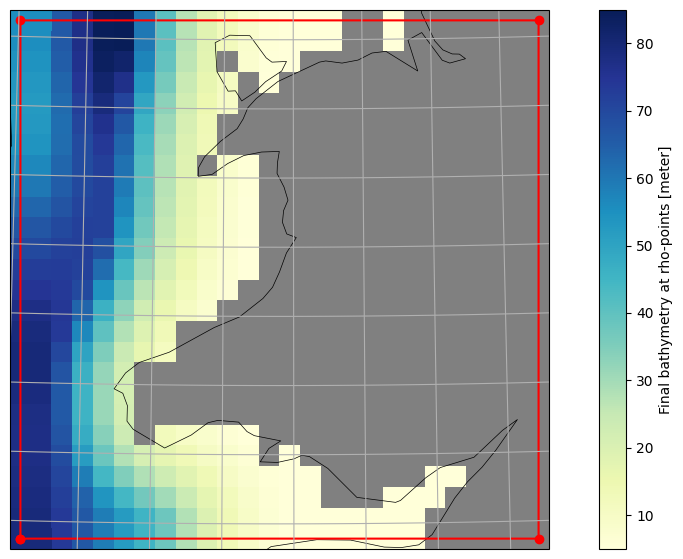

In [22]:
coarse_grid_wales_ETOPO5.plot(bathymetry=True)

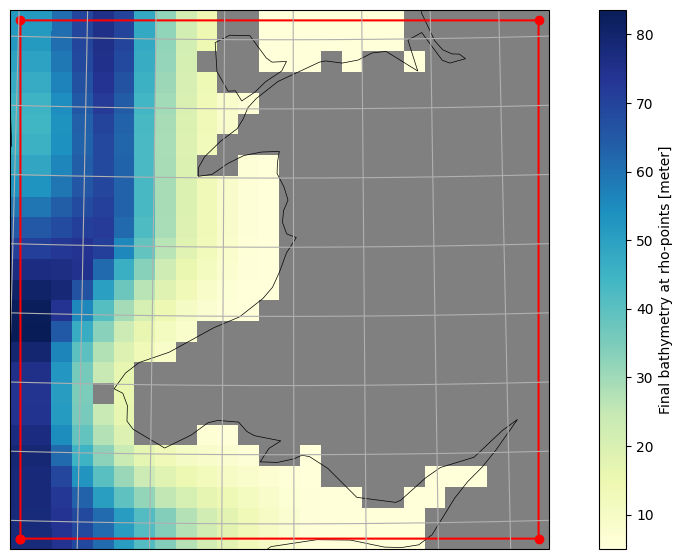

In [23]:
coarse_grid_wales_SRTM15.plot(bathymetry=True)

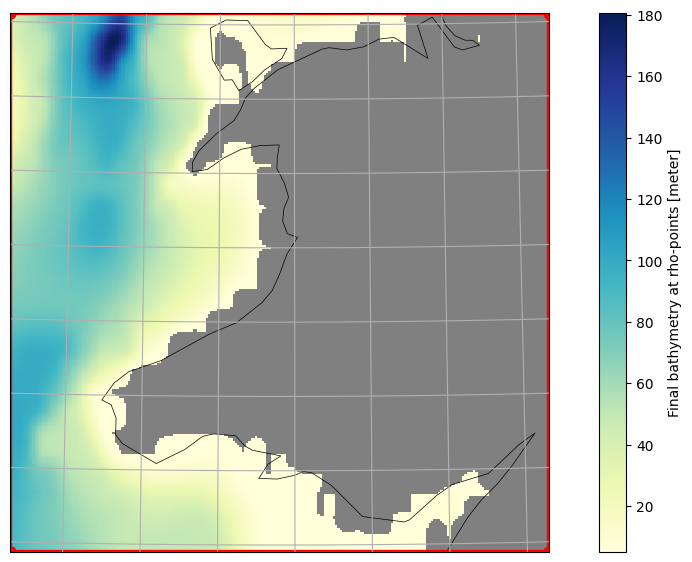

In [41]:
medium_grid_wales_ETOPO5.plot(bathymetry=True)

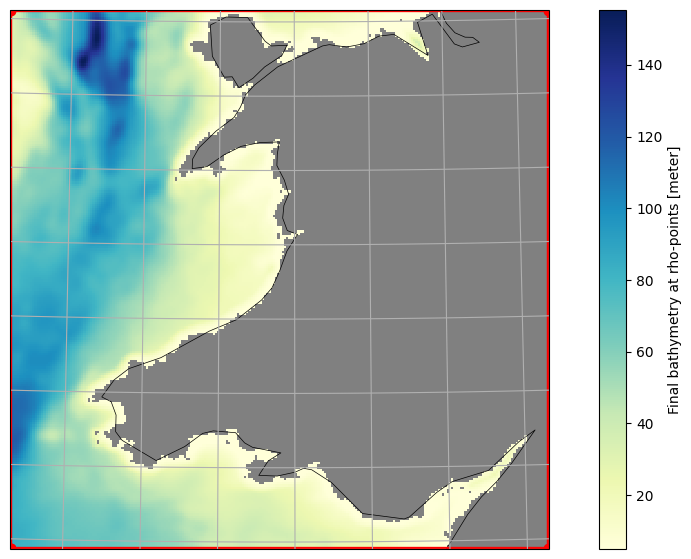

In [42]:
medium_grid_wales_SRTM15.plot(bathymetry=True)

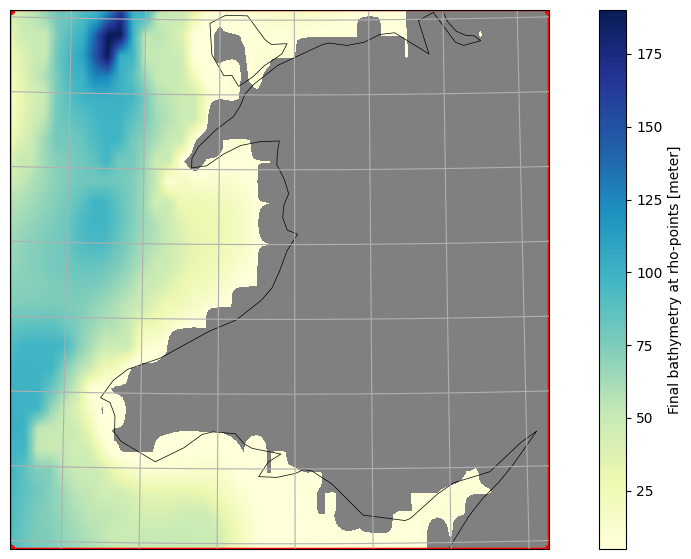

In [24]:
fine_grid_wales_ETOPO5.plot(bathymetry=True)

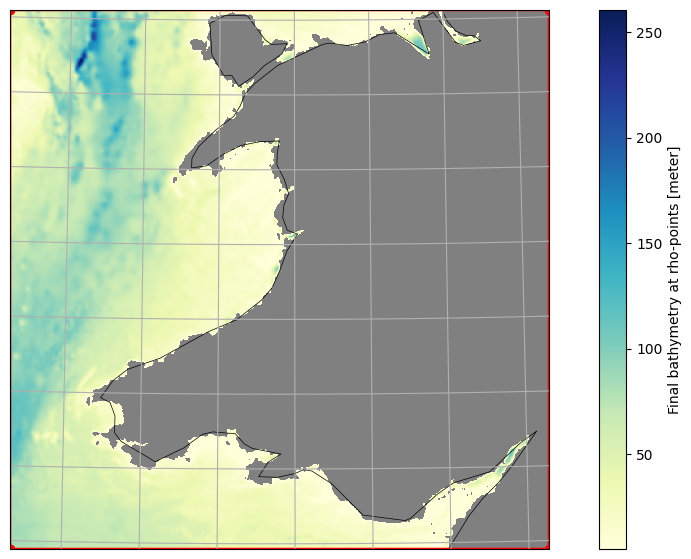

In [25]:
fine_grid_wales_SRTM15.plot(bathymetry=True)

## Are these tiny islands present in the original data? Yes!

### Iceland

In [43]:
target_coords = get_target_coords(fine_grid_iceland_SRTM15)

In [44]:
srtm15_data = _get_topography_data(        
    {
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }
)   
srtm15_data.choose_subdomain(target_coords, buffer_points=3)

In [45]:
mask = srtm15_data.ds["z"] < 0

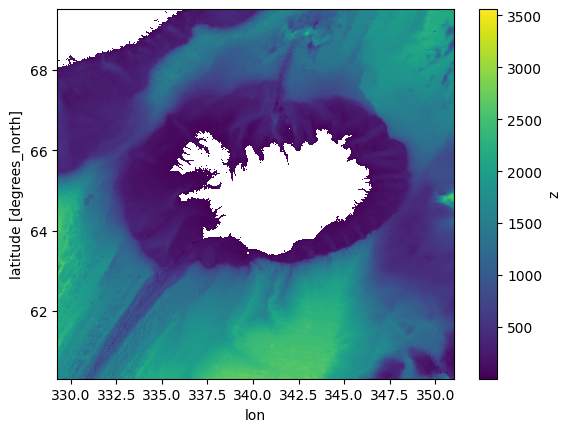

In [46]:
(-srtm15_data.ds["z"]).where(mask).plot()

In [59]:
import matplotlib.pyplot as plt

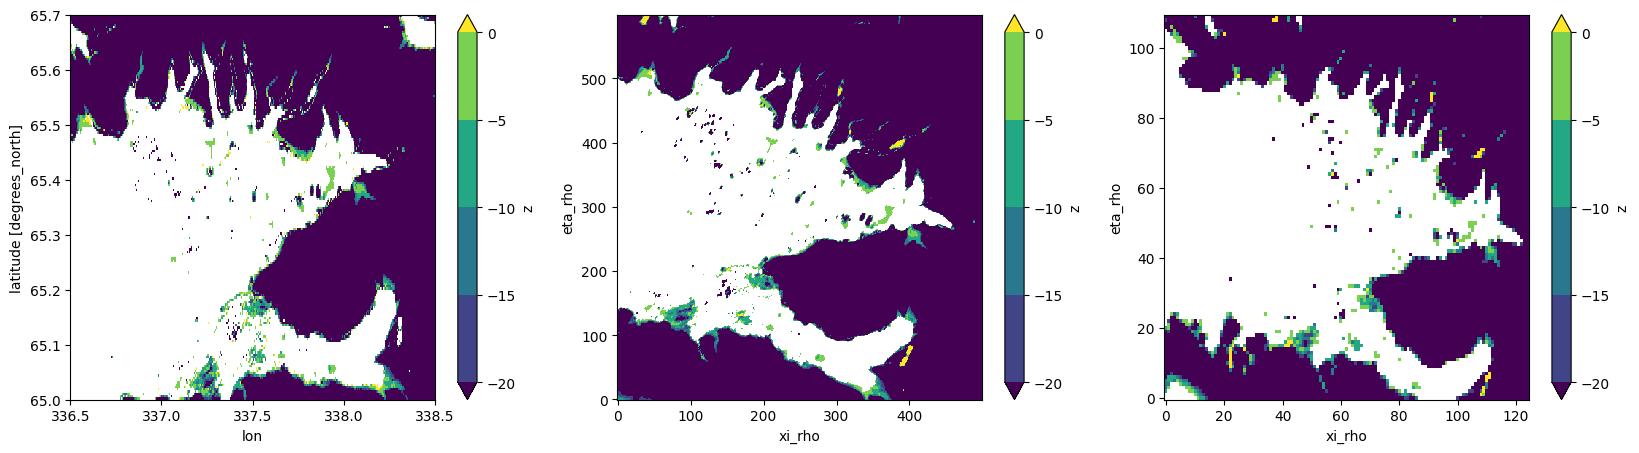

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
(-srtm15_data.ds["z"]).where(~mask).sel(lon=slice(336.5, 338.5), lat=slice(65, 65.7)).plot(vmin=-20, vmax=0, levels=5, extend="both", ax=axs[0])
fine_grid_iceland_SRTM15.ds.hraw.where(1 - (fine_grid_iceland_SRTM15.ds.mask_rho)).sel(xi_rho=slice(1400, 1900), eta_rho=slice(2800, 3400)).plot(vmax=0, vmin=-20, levels=5, ax=axs[1])
medium_grid_iceland_SRTM15.ds.hraw.where(1 - (medium_grid_iceland_SRTM15.ds.mask_rho)).sel(xi_rho=slice(250, 375), eta_rho=slice(570, 680)).plot(vmax=0, vmin=-20, levels=5, ax=axs[2])

### Wales

In [49]:
target_coords = get_target_coords(fine_grid_wales_SRTM15)

In [50]:
srtm15_data = _get_topography_data(        
    {
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }
)   
srtm15_data.choose_subdomain(target_coords, buffer_points=3)

In [51]:
mask = srtm15_data.ds["z"] < 0

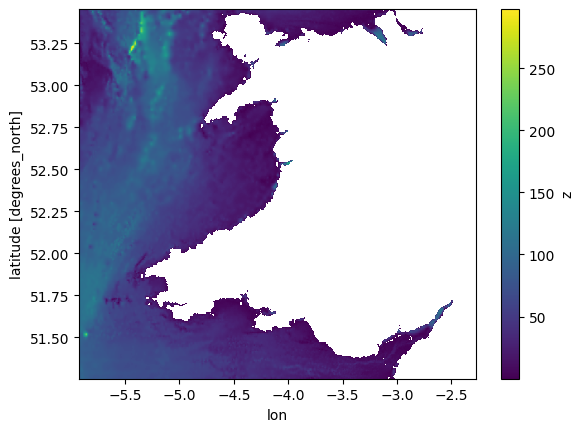

In [52]:
(-srtm15_data.ds["z"]).where(mask).plot()

## Global smoothing after regridding: Does not help

In [72]:
import gcm_filters

In [73]:
import numpy as np

In [92]:
def _smooth_topography_globally(hraw, factor, shape="gaussian", transition_width=np.pi) -> xr.DataArray:
    # since GCM-Filters assumes periodic domain, we extend the domain by one grid cell in each dimension
    # and set that margin to land

    mask = xr.ones_like(hraw)
    margin_mask = xr.concat([mask, 0 * mask.isel(eta_rho=-1)], dim="eta_rho")
    margin_mask = xr.concat(
        [margin_mask, 0 * margin_mask.isel(xi_rho=-1)], dim="xi_rho"
    )

    # we choose a Gaussian filter kernel corresponding to a Gaussian with standard deviation factor/sqrt(12);
    # this standard deviation matches the standard deviation of a boxcar kernel with total width equal to factor.
    if shape == "gaussian":
        filter_shape = gcm_filters.FilterShape.GAUSSIAN
    elif shape == "taper":
        filter_shape = gcm_filters.FilterShape.TAPER
        
    filter = gcm_filters.Filter(
        filter_scale=factor,
        dx_min=1,
        filter_shape=filter_shape,
        transition_width=transition_width,
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
        grid_vars={"wet_mask": margin_mask},
    )
    hraw_extended = xr.concat([hraw, hraw.isel(eta_rho=-1)], dim="eta_rho")
    hraw_extended = xr.concat(
        [hraw_extended, hraw_extended.isel(xi_rho=-1)], dim="xi_rho"
    )

    hsmooth = filter.apply(hraw_extended, dims=["eta_rho", "xi_rho"])
    hsmooth = hsmooth.isel(eta_rho=slice(None, -1), xi_rho=slice(None, -1))

    return hsmooth

In [105]:
def dealiase_bathy(factor, shape="gaussian", transition_width=np.pi, plot_mask=True, zoom=False):

    if zoom:
        eta_slice = slice(2800, 3400)
        xi_slice = slice(1400, 1900)
    else:
        eta_slice = slice(None, None)
        xi_slice = slice(None, None)
    hsmooth = _smooth_topography_globally(fine_grid_iceland_SRTM15.ds.hraw, factor=factor, shape=shape, transition_width=transition_width)
    mask = xr.where(hsmooth > 0.0, 1.0, 0.0)

    
    if plot_mask:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
        fine_grid_iceland_SRTM15.ds["mask_rho"].isel(eta_rho=eta_slice, xi_rho=xi_slice).plot(ax=axs[0])
        mask.isel(eta_rho=eta_slice, xi_rho=xi_slice).plot(ax=axs[1])
        (fine_grid_iceland_SRTM15.ds["mask_rho"] - mask).isel(eta_rho=eta_slice, xi_rho=xi_slice).plot(ax=axs[2])
    else:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        fine_grid_iceland_SRTM15.ds.hraw.where(1 - (fine_grid_iceland_SRTM15.ds.mask_rho)).isel(eta_rho=eta_slice, xi_rho=xi_slice).plot(vmax=0, vmin=-20, levels=5, extend="both", ax=axs[0])
        hsmooth.where(1 - mask).isel(eta_rho=eta_slice, xi_rho=xi_slice).plot(vmax=0, vmin=-20, levels=5, extend="both", ax=axs[1])
        
    
    axs[0].set_title("no smoothing")
    axs[1].set_title(f"smoothing with {shape}, factor = {factor}, tw = {transition_width}")
    if plot_mask:
        axs[2].set_title("Difference")

CPU times: user 4.79 s, sys: 3.97 s, total: 8.76 s
Wall time: 9.94 s


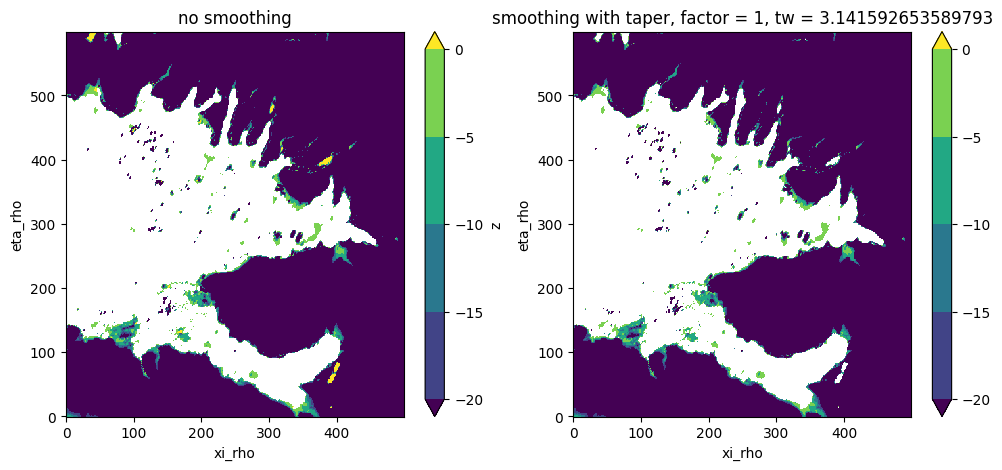

In [106]:
%time dealiase_bathy(factor=1, shape="taper", plot_mask=False, zoom=True)

CPU times: user 8.77 s, sys: 6.92 s, total: 15.7 s
Wall time: 16.7 s


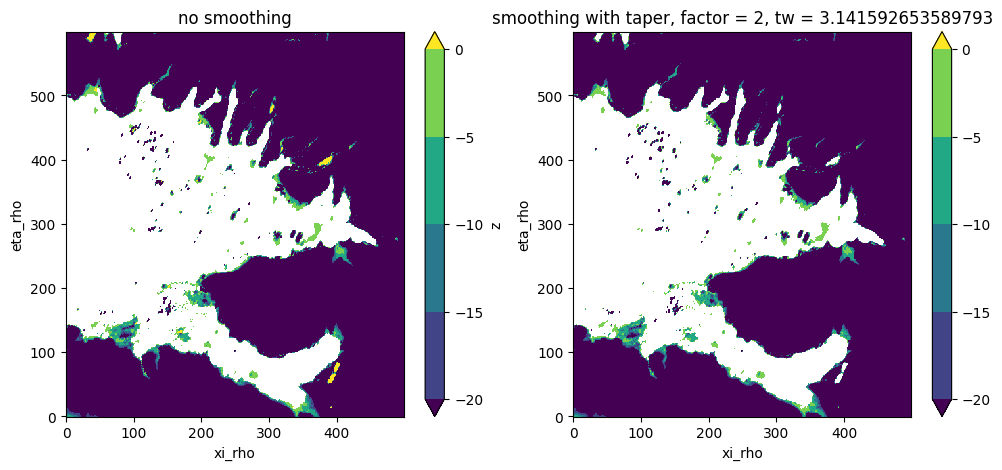

In [107]:
%time dealiase_bathy(factor=2, shape="taper", plot_mask=False, zoom=True)

CPU times: user 4.12 s, sys: 3.19 s, total: 7.31 s
Wall time: 7.67 s


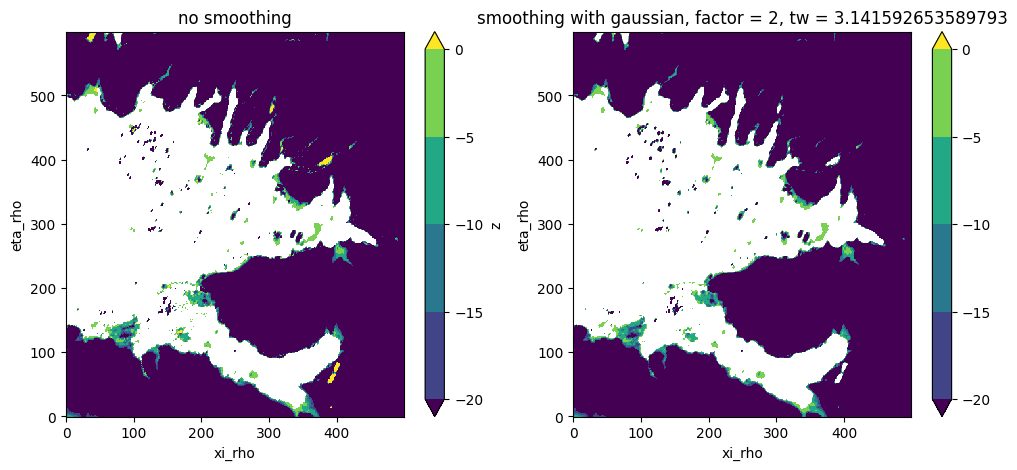

In [108]:
%time dealiase_bathy(factor=2, shape="gaussian", plot_mask=False, zoom=True)

CPU times: user 5.74 s, sys: 4.57 s, total: 10.3 s
Wall time: 10.9 s


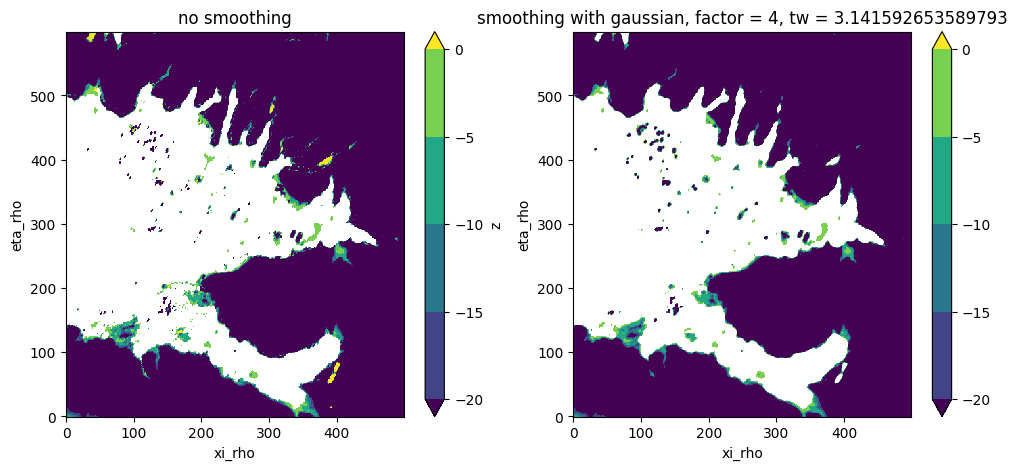

In [109]:
%time dealiase_bathy(factor=4, shape="gaussian", plot_mask=False, zoom=True)

CPU times: user 9.17 s, sys: 7.88 s, total: 17.1 s
Wall time: 19 s


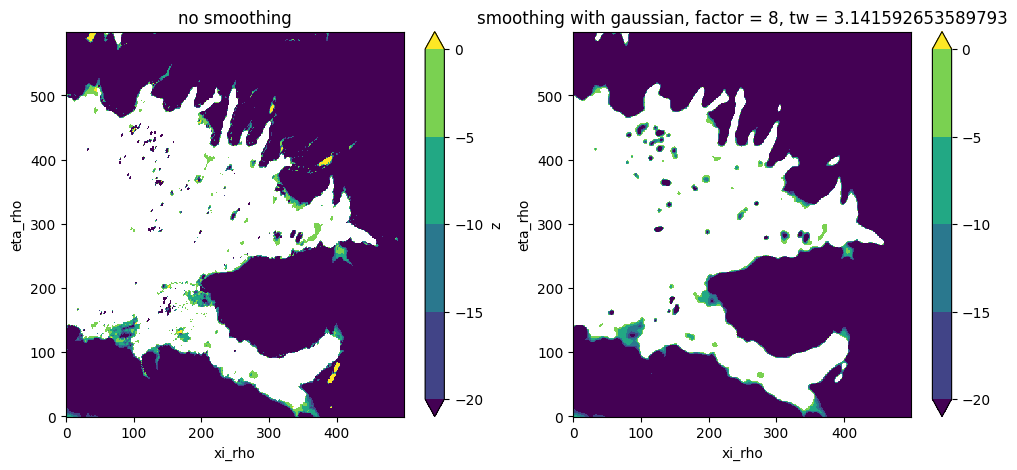

In [110]:
%time dealiase_bathy(factor=8, shape="gaussian", plot_mask=False, zoom=True)

CPU times: user 3.9 s, sys: 3.3 s, total: 7.19 s
Wall time: 7.83 s


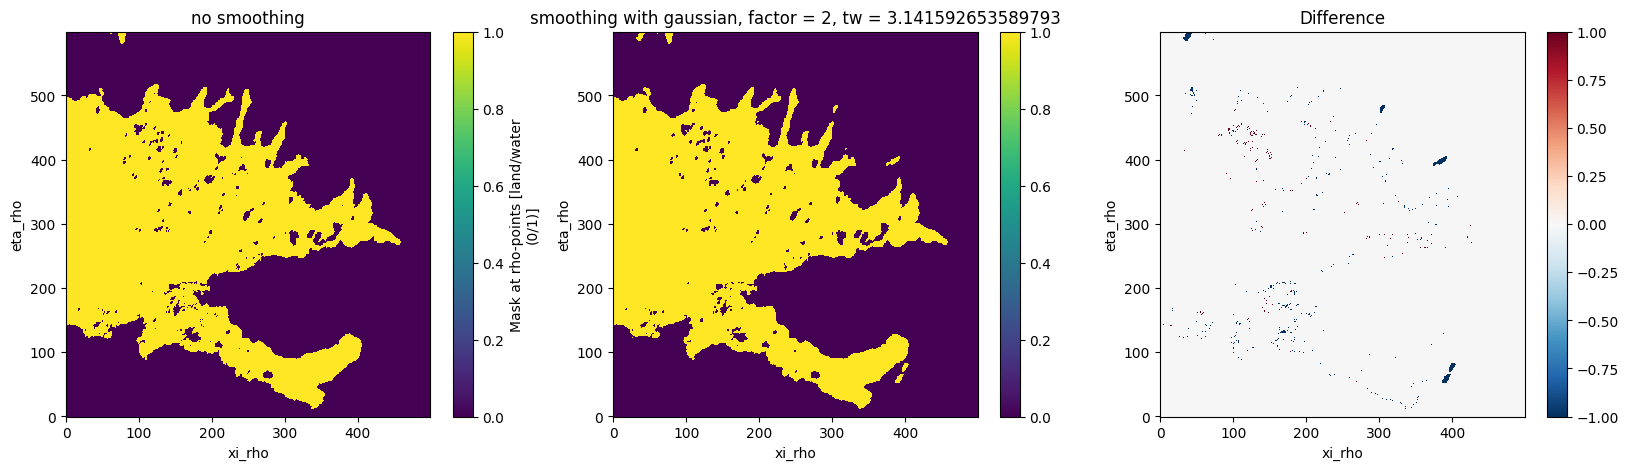

In [103]:
%time dealiase_bathy(factor=2, shape="gaussian", zoom=True)

## Global smoothing before regridding

In [112]:
target_coords = get_target_coords(fine_grid_iceland_SRTM15)

In [113]:
srtm15_data = _get_topography_data(        
    {
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/bachman/ROMS_tools/DATASETS/SRTM15_V2.5.nc",
    }
)   
srtm15_data.choose_subdomain(target_coords, buffer_points=3)

In [114]:
srtm15_data.ds

<xarray.Dataset> Size: 46MB
Dimensions:  (lon: 5223, lat: 2212)
Coordinates:
  * lon      (lon) float64 42kB 329.3 329.3 329.3 329.3 ... 351.0 351.0 351.0
  * lat      (lat) float64 18kB 60.31 60.31 60.31 60.32 ... 69.51 69.51 69.52
Data variables:
    z        (lat, lon) float32 46MB ...
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdmath
    history:      gmt grdmath SRTM15+V2.1_land_masked.nc debug/polished.unmas...
    description:  
    GMT_version:  6.4.0 [64-bit]
    node_offset:  1

In [115]:
def _smooth_topography_globally_before_regridding(hraw, factor, shape="gaussian", transition_width=np.pi) -> xr.DataArray:
    # since GCM-Filters assumes periodic domain, we extend the domain by one grid cell in each dimension
    # and set that margin to land

    mask = xr.ones_like(hraw)
    margin_mask = xr.concat([mask, 0 * mask.isel(lat=-1)], dim="lat")
    margin_mask = xr.concat(
        [margin_mask, 0 * margin_mask.isel(lon=-1)], dim="lon"
    )

    # we choose a Gaussian filter kernel corresponding to a Gaussian with standard deviation factor/sqrt(12);
    # this standard deviation matches the standard deviation of a boxcar kernel with total width equal to factor.
    if shape == "gaussian":
        filter_shape = gcm_filters.FilterShape.GAUSSIAN
    elif shape == "taper":
        filter_shape = gcm_filters.FilterShape.TAPER
        
    filter = gcm_filters.Filter(
        filter_scale=factor,
        dx_min=1,
        filter_shape=filter_shape,
        transition_width=transition_width,
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
        grid_vars={"wet_mask": margin_mask},
    )
    hraw_extended = xr.concat([hraw, hraw.isel(lat=-1)], dim="lat")
    hraw_extended = xr.concat(
        [hraw_extended, hraw_extended.isel(lon=-1)], dim="lon"
    )

    hsmooth = filter.apply(hraw_extended, dims=["lat", "lon"])
    hsmooth = hsmooth.isel(lat=slice(None, -1), lon=slice(None, -1))

    return hsmooth

In [120]:
def remove_noise_before_regridding(factor, shape="gaussian"):

    hsmooth = _smooth_topography_globally_before_regridding(srtm15_data.ds["z"], factor, shape)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = srtm15_data.ds["z"] < 0
    (-srtm15_data.ds["z"]).where(~mask).sel(lon=slice(336.5, 338.5), lat=slice(65, 65.7)).plot(vmin=-20, vmax=0, levels=5, extend="both", ax=axs[0])
    mask = hsmooth < 0
    (-hsmooth).where(~mask).sel(lon=slice(336.5, 338.5), lat=slice(65, 65.7)).plot(vmin=-20, vmax=0, levels=5, extend="both", ax=axs[1])


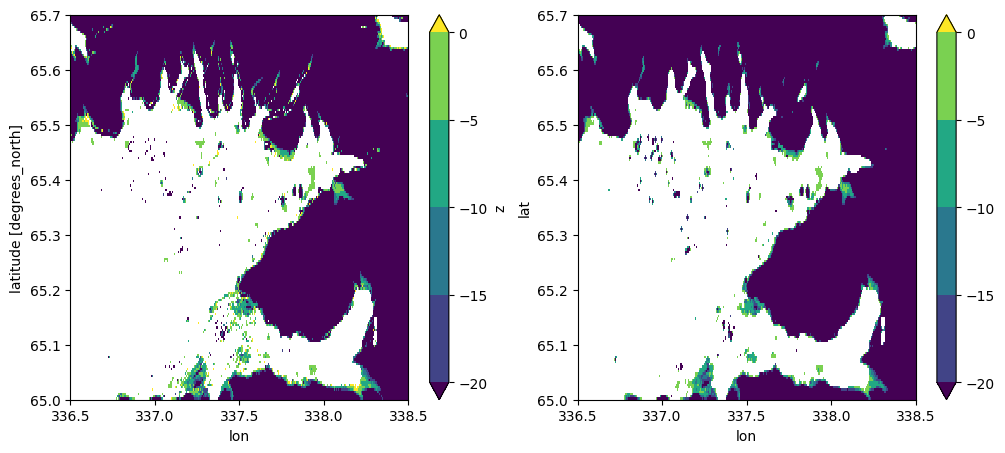

In [121]:
remove_noise_before_regridding(factor=2)

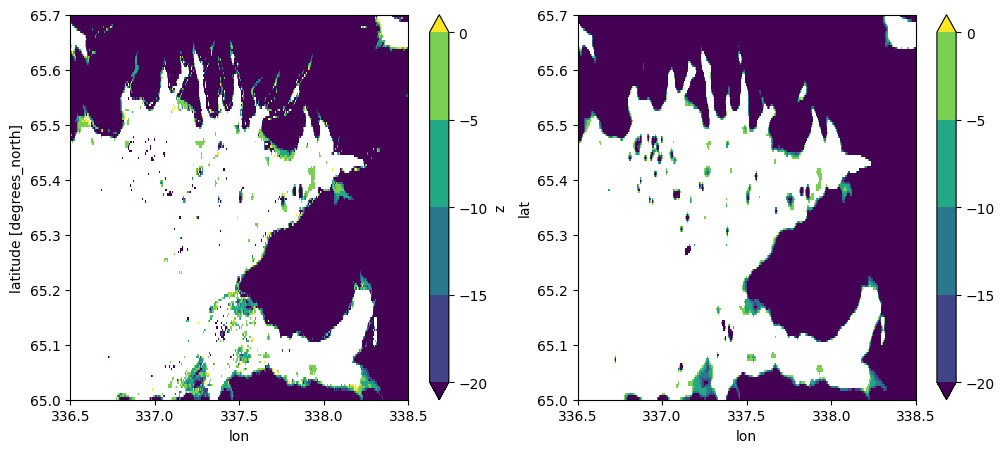

In [122]:
remove_noise_before_regridding(factor=4)

## Matlab scripts

In [53]:
ds = xr.open_dataset("/glade/u/home/noraloose/roms_grd.nc")

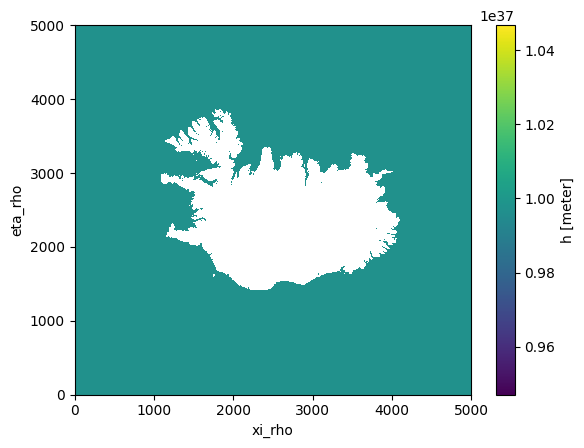

In [59]:
ds.h.where(ds.mask_rho).plot()

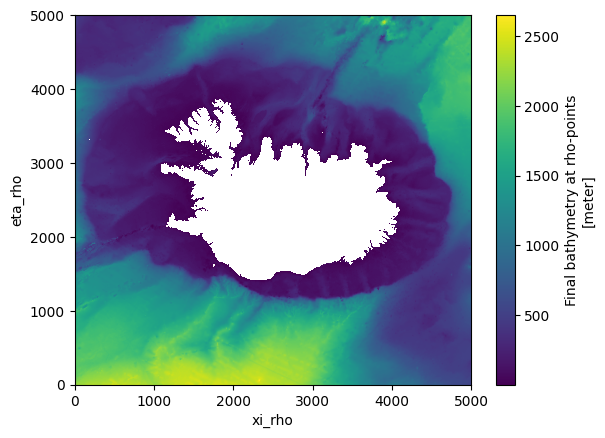

In [60]:
fine_grid_iceland_SRTM15.ds.h.where(fine_grid_iceland_SRTM15.ds.mask_rho).plot()

## Interpolation method: Doesn't fix the small island problem. Also: xesmf is incredibly slow

In [46]:
import xesmf

In [48]:
target_coords = get_target_coords(fine_grid_iceland_ETOPO5)

In [18]:
ds_out = xr.Dataset()
ds_out["lat"] = target_coords["lat"]
ds_out["lon"] = target_coords["lon"]
ds_out["lat_b"] = target_coords["lat_psi"]
ds_out["lon_b"] = target_coords["lon_psi"]

In [13]:
srtm15_data = _get_topography_data(        
    {
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    }
)   
srtm15_data.choose_subdomain(target_coords, buffer_points=3)

In [15]:
regridders = {}

In [19]:
method = "conservative"
%time regridders[method] = xesmf.Regridder(srtm15_data.ds, ds_out, method=method)

CPU times: user 11min 45s, sys: 22.9 s, total: 12min 8s
Wall time: 12min 14s


Memory footprint: > 50 GB

In [20]:
%time hraw_conservative = - regridders["conservative"](srtm15_data.ds["z"])

CPU times: user 5.79 s, sys: 73.7 ms, total: 5.86 s
Wall time: 7.61 s


Text(0.5, 1.0, 'Difference')

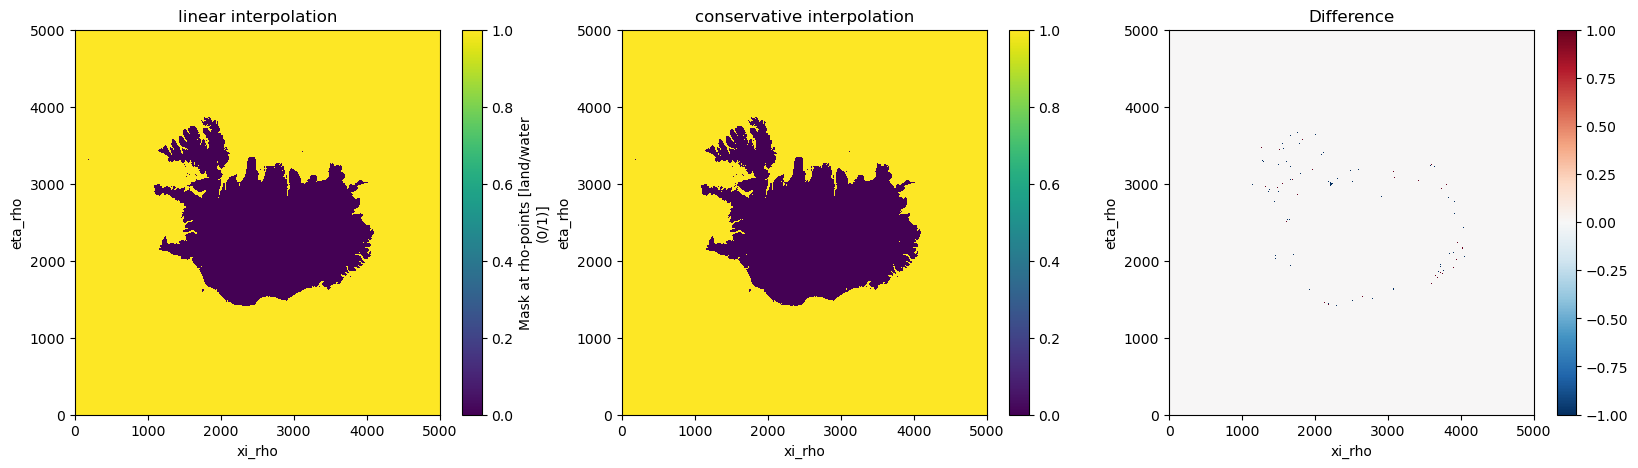

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
axs[0].set_title("linear interpolation")
xr.where(hraw_conservative > 0.0, 1.0, 0.0).plot(ax=axs[1])
axs[1].set_title("conservative interpolation")
(fine_grid_iceland.ds["mask_rho"] - xr.where(hraw_conservative > 0.0, 1.0, 0.0)).plot(ax=axs[2])
axs[2].set_title("Difference")

In [30]:
method = "bilinear"
%time regridders[method] = xesmf.Regridder(srtm15_data.ds, ds_out, method=method)

CPU times: user 7min 8s, sys: 32 s, total: 7min 40s
Wall time: 7min 41s


In [31]:
%time hraw_bilinear = - regridders["bilinear"](srtm15_data.ds["z"])

CPU times: user 7.26 s, sys: 3.83 ms, total: 7.27 s
Wall time: 7.26 s


Text(0.5, 1.0, 'Difference')

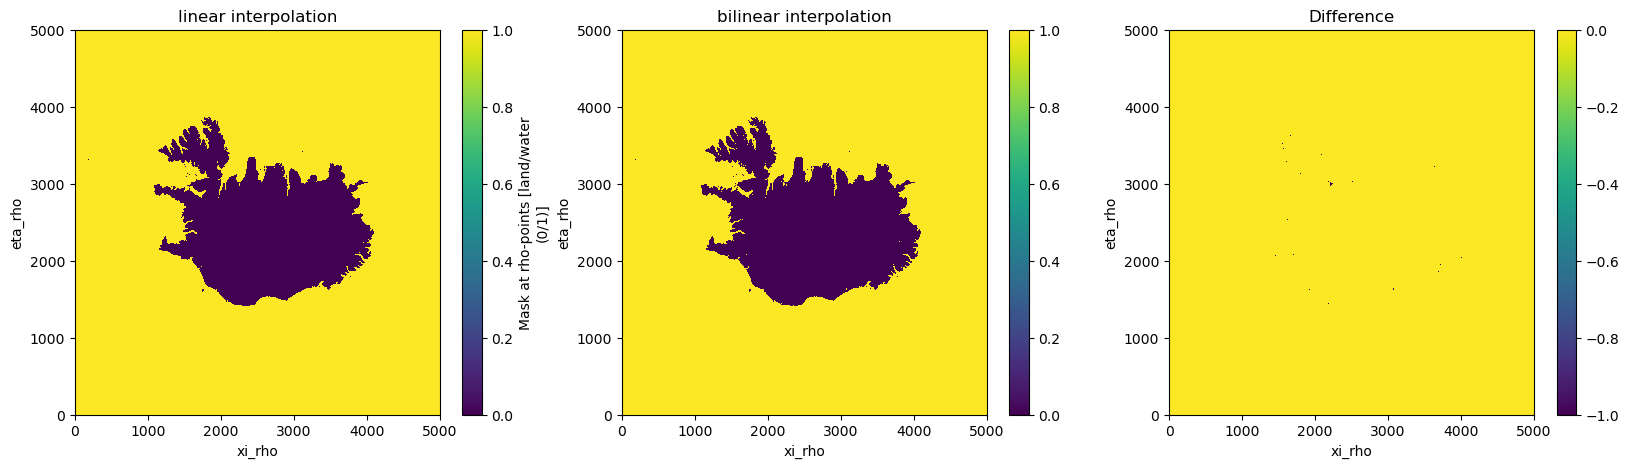

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
axs[0].set_title("linear interpolation")
xr.where(hraw_conservative > 0.0, 1.0, 0.0).plot(ax=axs[1])
axs[1].set_title("bilinear interpolation")
(fine_grid_iceland.ds["mask_rho"] - xr.where(hraw_bilinear > 0.0, 1.0, 0.0)).plot(ax=axs[2])
axs[2].set_title("Difference")

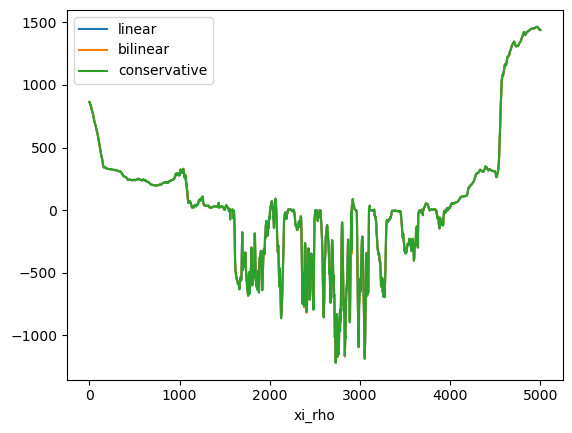

In [32]:
fine_grid_iceland.ds["hraw"].isel(eta_rho=3000).plot(label="linear")
hraw_bilinear.isel(eta_rho=3000).plot(label="bilinear")
hraw_conservative.isel(eta_rho=3000).plot(label="conservative")

plt.legend()